In [18]:
import pandas as pd
import numpy as np
import cv2
import glob

import matplotlib.pyplot as plt

import Utils.EvaluationMetrics.alphaScore as AS
import Utils.EvaluationMetrics.exampleBased as EB
import Utils.EvaluationMetrics.labelBased as LB

import torch

In [13]:
data = pd.read_csv("../data/game_data.csv")
print(data.shape)

(25394, 6)


In [15]:
print(data[data["game_identifier"] != 'loz']["features"].unique())
for affrodanceList in data[data["game_identifier"] == 'loz']["features"].unique():
    if affrodanceList not in data[data["game_identifier"] != 'loz']["features"].unique():
        print(affrodanceList)

["['solid']" "['passable', 'empty']" "['solid', 'breakable']"
 "['passable', 'collectable']" "['passable', 'climbable']"
 "['solid', 'passable']" "['solid', 'hazard']" "['solid', 'pipe']"
 "['solid', 'passable', 'moving']" "['empty']" "['solid', 'openable']"
 "['solid', 'moving']" "['hazard', 'moving']" "['solid', 'collectable']"]
['solid', 'wall']
['element', 'block']
['solid', 'block']


In [90]:
for gamename in data["game_identifier"].unique():
    gameData = data[data["game_identifier"] == gamename]

    print(gamename)
    for affordance in gameData["features"].unique():
        amount = gameData[gameData['features'] == affordance].shape[0]
        print(f"{affordance}: {amount} | {amount / gameData.shape[0]:.2f}")
    print("")

kid_icarus
['solid']: 388 | 0.38
['solid', 'passable']: 95 | 0.09
['passable', 'empty']: 448 | 0.44
['solid', 'passable', 'moving']: 29 | 0.03
['solid', 'openable']: 26 | 0.03
['solid', 'hazard']: 25 | 0.02

smb
['passable', 'empty']: 1094 | 0.55
['solid']: 402 | 0.20
['passable', 'collectable']: 68 | 0.03
['solid', 'pipe']: 108 | 0.05
['solid', 'breakable']: 230 | 0.12
['hazard', 'moving']: 68 | 0.03
['solid', 'collectable']: 17 | 0.01
['solid', 'hazard']: 12 | 0.01

lode_runner
['passable', 'empty']: 5432 | 0.31
['solid', 'breakable']: 4836 | 0.28
['passable', 'collectable']: 985 | 0.06
['passable', 'climbable']: 4145 | 0.24
['solid']: 1860 | 0.11
['solid', 'hazard']: 293 | 0.02

loz
['solid']: 682 | 0.41
['solid', 'hazard']: 20 | 0.01
['solid', 'wall']: 351 | 0.21
['element', 'block']: 260 | 0.16
['passable', 'empty']: 103 | 0.06
['solid', 'openable']: 83 | 0.05
['solid', 'block']: 160 | 0.10
['passable', 'climbable']: 3 | 0.00

megaman
['passable', 'empty']: 1252 | 0.39
['solid']: 

In [70]:
data = pd.read_csv("../data/tomData/unshuffled3x3tiles.csv")
print(data.shape)

(19992, 4)


In [4]:
unqiueAffordanceList = {}

for gamename in data["gamename"].unique():
    gameData = data[data["gamename"] == gamename]

    print(gamename)
    unqiueAffordanceList[gamename] = gameData["affordances"].unique()
    for affordance in gameData["affordances"].unique():
        amount = gameData[gameData['affordances'] == affordance].shape[0]
        print(f"{affordance}: {amount} | {amount / gameData.shape[0]:.2f}")
    print("")

kidicarus
['solid']: 299 | 0.34
['passable', 'empty']: 393 | 0.45
['solid', 'openable']: 26 | 0.03
['solid', 'passable', 'moving']: 31 | 0.04
['solid', 'passable']: 108 | 0.12
['solid', 'hazard']: 25 | 0.03

loderunner
['passable', 'climbable']: 3630 | 0.24
['passable', 'empty']: 4781 | 0.32
['solid']: 1509 | 0.10
['solid', 'hazard']: 243 | 0.02
['passable', 'collectable']: 869 | 0.06
['solid', 'breakable']: 4119 | 0.27

megaman
['solid']: 543 | 0.37
['passable', 'empty']: 598 | 0.41
['empty']: 77 | 0.05
['solid', 'hazard']: 66 | 0.04
['solid', 'breakable']: 41 | 0.03
['solid', 'moving']: 21 | 0.01
['passable', 'collectable']: 35 | 0.02
['passable', 'climbable']: 88 | 0.06

supermariobros
['passable', 'empty']: 488 | 0.57
['solid', 'pipe']: 54 | 0.06
['solid', 'collectable']: 17 | 0.02
['solid', 'hazard']: 6 | 0.01
['hazard', 'moving']: 34 | 0.04
['solid']: 119 | 0.14
['solid', 'breakable']: 108 | 0.13
['passable', 'collectable']: 34 | 0.04

thelegendofzelda
['passable', 'empty']: 87 |

In [34]:
a = np.random.randint(0, 10, size=(10))
a

array([0, 3, 4, 4, 2, 4, 0, 3, 6, 8])

In [35]:
np.mean(a)

np.float64(3.4)

In [36]:
(1 / 10) * np.sum(a)

np.float64(3.4000000000000004)

In [12]:
data[data["gamename"] == 'thelegendofzelda']["affordances"].unique()

array(["['passable', 'empty']", "['solid']", "['solid', 'wall']",
       "['solid', 'openable']", "['solid', 'block']",
       "['solid', 'hazard']", "['passable', 'climbable']",
       "['element', 'block']"], dtype=object)

In [11]:
print(data[data["gamename"] != 'thelegendofzelda']["affordances"].unique())
for affrodanceList in data[data["gamename"] == 'thelegendofzelda']["affordances"].unique():
    if affrodanceList not in data[data["gamename"] != 'thelegendofzelda']["affordances"].unique():
        print(affrodanceList)

["['solid']" "['passable', 'empty']" "['solid', 'openable']"
 "['solid', 'passable', 'moving']" "['solid', 'passable']"
 "['solid', 'hazard']" "['passable', 'climbable']"
 "['passable', 'collectable']" "['solid', 'breakable']" "['empty']"
 "['solid', 'moving']" "['solid', 'pipe']" "['solid', 'collectable']"
 "['hazard', 'moving']"]
['solid', 'wall']
['solid', 'block']
['element', 'block']


In [12]:
for affordance in data["affordances"].unique():
    amount = data[data['affordances'] == affordance].shape[0]
    print(f"{affordance}: {amount} | {amount / data.shape[0]:.2f}")

['solid']: 3154 | 0.16
['passable', 'empty']: 6347 | 0.32
['solid', 'openable']: 109 | 0.01
['solid', 'passable', 'moving']: 31 | 0.00
['solid', 'passable']: 108 | 0.01
['solid', 'hazard']: 360 | 0.02
['passable', 'climbable']: 3721 | 0.19
['passable', 'collectable']: 938 | 0.05
['solid', 'breakable']: 4268 | 0.21
['empty']: 77 | 0.00
['solid', 'moving']: 21 | 0.00
['solid', 'pipe']: 54 | 0.00
['solid', 'collectable']: 17 | 0.00
['hazard', 'moving']: 34 | 0.00
['solid', 'wall']: 331 | 0.02
['solid', 'block']: 160 | 0.01
['element', 'block']: 262 | 0.01


In [17]:
def example_based_precision(y_true,y_pred):
    n=len(y_true)
    
    precision_num=np.sum(np.logical_and(y_true,y_pred),axis=1)
    precision_den=np.sum(y_pred,axis=1)

    p_n=np.array(precision_num).astype(np.float32)
    p_d=np.array(precision_den).astype(np.float32)

    avg_precision=np.nansum(p_n/p_d)/float(n)
    
    return avg_precision

In [24]:
yPred = np.zeros(shape=(10, 13))
yTrue = np.zeros(shape=(10, 13))

yTrue[:3, :5] = 1
yPred[:3, 3:] = 1

print(yTrue)
print("")
print(yPred)

print(example_based_precision(yTrue, yPred))

[[1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

[[0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0.060000002


/tmp/ipykernel_997/969533445.py:10: RuntimeWarning: invalid value encountered in divide
  avg_precision=np.nansum(p_n/p_d)/float(n)


In [177]:
bb = [
'tloz9_2',
'tloz1_2',
'tloz6_2',
'tloz3_2',
'tloz7_2',
'tloz5_2',
'tloz8_2',
'tloz8_1',
'tloz2_2',
'tloz5_1',
'tloz3_1',
'tloz9_1',
'tloz2_1',
'tloz6_1',
'tloz4_1',
'tloz1_1',
'tloz7_1',
]
print(len(bb))

lozTextLevelPaths = [path[path.rfind('/')+1:path.find('.txt')] for path in glob.glob("../data/vglc/The Legend of Zelda/Processed/tloz[0-9]_[0-9].txt")]
print(len(lozTextLevelPaths))
print(lozTextLevelPaths)
lozTextLevelPaths = sorted(lozTextLevelPaths)

for i, level in enumerate(sorted(bb)):
    print(level, " ", lozTextLevelPaths[i])
    

17
18
['tloz7_1', 'tloz5_1', 'tloz4_1', 'tloz2_2', 'tloz5_2', 'tloz8_1', 'tloz3_1', 'tloz6_1', 'tloz7_2', 'tloz2_1', 'tloz8_2', 'tloz1_2', 'tloz4_2', 'tloz3_2', 'tloz9_2', 'tloz6_2', 'tloz9_1', 'tloz1_1']
tloz1_1   tloz1_1
tloz1_2   tloz1_2
tloz2_1   tloz2_1
tloz2_2   tloz2_2
tloz3_1   tloz3_1
tloz3_2   tloz3_2
tloz4_1   tloz4_1
tloz5_1   tloz4_2
tloz5_2   tloz5_1
tloz6_1   tloz5_2
tloz6_2   tloz6_1
tloz7_1   tloz6_2
tloz7_2   tloz7_1
tloz8_1   tloz7_2
tloz8_2   tloz8_1
tloz9_1   tloz8_2
tloz9_2   tloz9_1


(352, 512, 3)


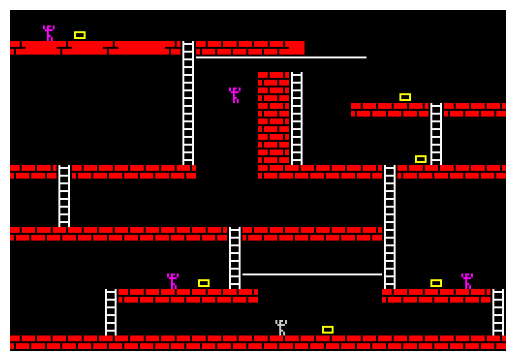

In [19]:
lrLevel1Image = cv2.cvtColor(cv2.imread("../data/vglc/Lode Runner/Original_Fixed_Tom/Level 1.png"), cv2.COLOR_BGR2RGB)

plt.axis(False)
plt.imshow(lrLevel1Image)
print(lrLevel1Image.shape)

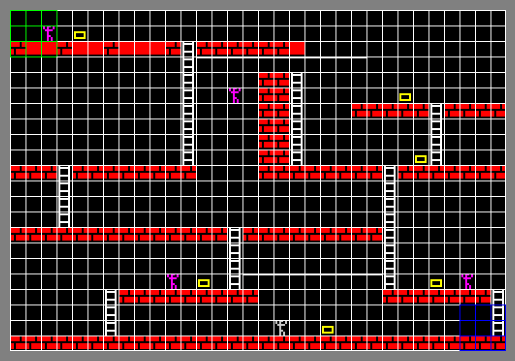

In [10]:
splitImage = lrLevel1Image.copy()

splitImage[::16, :, :] = (255, 255, 255)
splitImage[:, ::16, :] = (255, 255, 255)

splitImage[:, -1, :] = (255, 255, 255)
splitImage[-1, :, :] = (255, 255, 255)

splitImage[:64:16, :48, :] = (0, 255, 0)
splitImage[:48, :64:16, :] = (0, 255, 0)

splitImage[-48::16, -48:, :] = (0, 0, 255)
splitImage[-48:, -48::16, :] = (0, 0, 255)

splitImage[-48:, -1, :] = (0, 0, 255)
splitImage[-1, -48:, :] = (0, 0, 255)

fig = plt.figure()
fig.patch.set_facecolor('grey')

ax = fig.add_subplot(111)
ax.axis(False)

plt.imshow(splitImage)

In [104]:
a = np.ones(shape=(4, 10, 10, 3))
print(a.shape)

a = np.pad(a, ((0, 0), (0, 10), (0, 0), (0, 0)), constant_values=0)
print(a.shape)

(4, 10, 10, 3)
(4, 20, 10, 3)


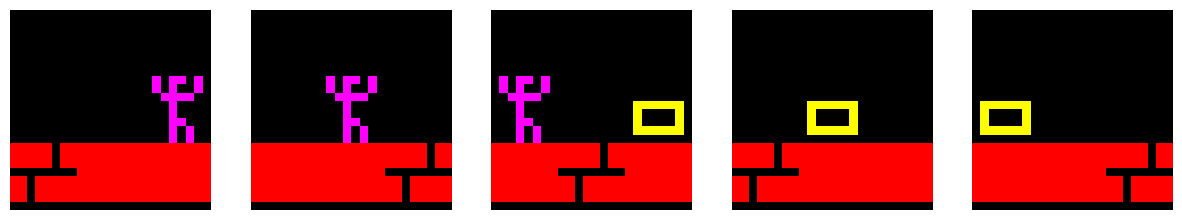

In [11]:
first5Kernels = [lrLevel1Image[:48, i*16:(i*16)+48, :] for i in range(5)]

fig, axes = plt.subplots(1, 5, figsize=(15, 15))

for i, ax in enumerate(axes):
    ax.axis(False)
    ax.imshow(first5Kernels[i])

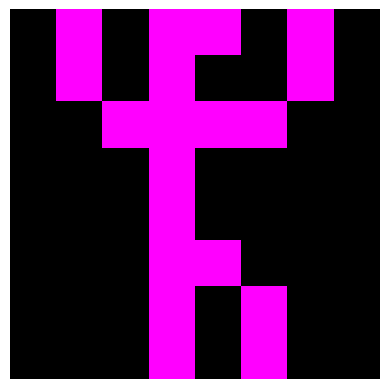

In [12]:
plt.axis(False)
plt.imshow(first5Kernels[1][16:32, 16:32, :])

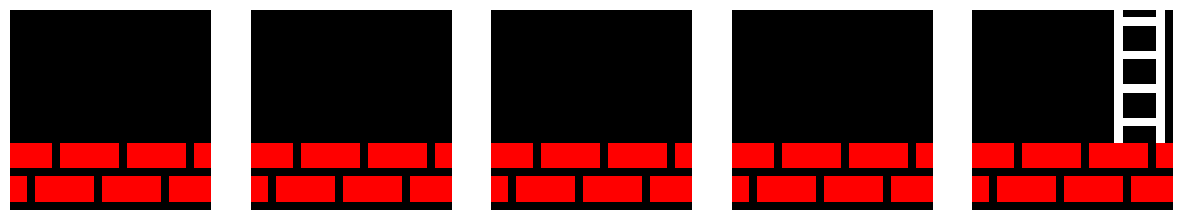

In [152]:
last5Kernels = [lrLevel1Image[-48:, 400+i*16:(400+i*16)+48, :] for i in range(5)]

fig, axes = plt.subplots(1, 5, figsize=(15, 15))

for i, ax in enumerate(axes):
    ax.axis(False)
    ax.imshow(last5Kernels[i])

In [15]:
levelPaths = ["../data/vglc/Lode Runner/Original_Fixed_Tom/Level 8.png", "../data/vglc/Kid Icarus/Original_Fixed/kidicarus_1.bmp", "../data/vglc/MegaMan/megaman_1_1.bmp", "../data/vglc/Super Mario Bros/Original_Fixed/mario-1-1.png", "../data/vglc/The Legend of Zelda/Original/tloz1_1.png"]

levelImages = [cv2.cvtColor(cv2.imread(levelPath), cv2.COLOR_BGR2RGB) for levelPath in levelPaths]

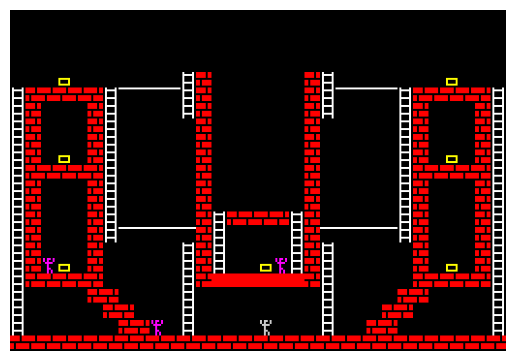

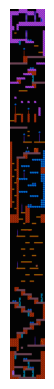

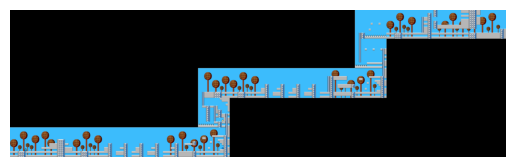

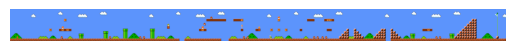

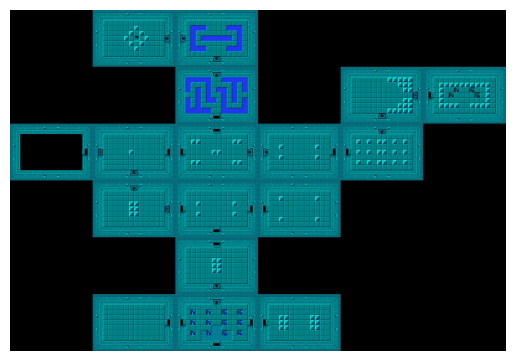

In [16]:
for image in levelImages:
    plt.figure()
    plt.imshow(image)
    plt.axis(False)

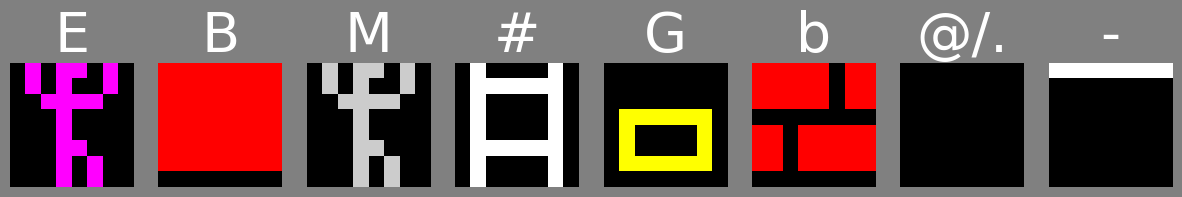

In [17]:
lrSpritePaths = glob.glob("../data/tomData/sprites/loderunner/*")
# lrSpritePaths = glob.glob("../data/sprites/loderunner/*")

lrTiles = [cv2.cvtColor(cv2.imread(spritePath), cv2.COLOR_BGR2RGB) for spritePath in lrSpritePaths]

fig, axes = plt.subplots(1, 8, figsize=(15, 15))
fig.patch.set_color("grey")

for i, ax in enumerate(axes):
    title = lrSpritePaths[i][lrSpritePaths[i].rfind('/')+1:lrSpritePaths[i].find('.png')]
    ax.set_title("@/." if title == "@" else title, color='white', fontsize=40)
    ax.axis(False)
    ax.imshow(lrTiles[i])

In [31]:
lrSpritePaths = glob.glob("/home/surfytom/Projects/Dissertation/Repos/TileEmbeddingDissertation/data/tomData/sprites/loderunner/*.png")
lrSprites = {path[path.rfind("/")+1:path.rfind(".png")]: cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in lrSpritePaths}

lrLevel1ImageCopy = lrLevel1Image.copy()

tiles = ""
for i in range(0, lrLevel1ImageCopy.shape[0], 16):
    for j in range(0, lrLevel1ImageCopy.shape[1], 16):
        for k, v in lrSprites.items():
            if (lrLevel1ImageCopy[i:i+16, j:j+16, :] == v).all():
                tiles += k
    
    tiles += "\n"

for row in tiles:
    print(row)

with open(f"test.txt", "w") as f:
        f.writelines(tiles)

@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@


@
@
E
@
G
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@


b
B
B
b
B
B
b
B
B
B
b
#
b
b
b
b
b
b
B
@
@
@
@
@
@
@
@
@
@
@
@
@


@
@
@
@
@
@
@
@
@
@
@
#
-
-
-
-
-
-
-
-
-
-
-
@
@
@
@
@
@
@
@
@


@
@
@
@
@
@
@
@
@
@
@
#
@
@
@
@
b
b
#
@
@
@
@
@
@
@
@
@
@
@
@
@


@
@
@
@
@
@
@
@
@
@
@
#
@
@
E
@
b
b
#
@
@
@
@
@
@
G
@
@
@
@
@
@


@
@
@
@
@
@
@
@
@
@
@
#
@
@
@
@
b
b
#
@
@
@
b
b
b
b
b
#
b
b
b
b


@
@
@
@
@
@
@
@
@
@
@
#
@
@
@
@
b
b
#
@
@
@
@
@
@
@
@
#
@
@
@
@


@
@
@
@
@
@
@
@
@
@
@
#
@
@
@
@
b
b
#
@
@
@
@
@
@
@
@
#
@
@
@
@


@
@
@
@
@
@
@
@
@
@
@
#
@
@
@
@
b
b
#
@
@
@
@
@
@
@
G
#
@
@
@
@


b
b
b
#
b
b
b
b
b
b
b
b
@
@
@
@
b
b
b
b
b
b
b
b
#
b
b
b
b
b
b
b


@
@
@
#
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
#
@
@
@
@
@
@
@


@
@
@
#
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
#
@
@
@
@
@
@
@


@
@
@
#
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
@
#
@
@
@
@
@
@
@


b
b
b
b
b
b
b
b
b
b
b
b
b
b
#
b
b
b
b
b
b
b
b
b
#
@
@
@
@
@
@
@


@
@
@
@
@


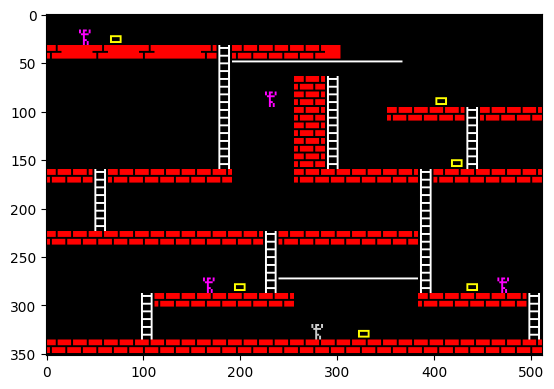

In [9]:
plt.imshow(lrLevel1ImageCopy)

In [ ]:
lrImages = glob.glob("/home/surfytom/Projects/Dissertation/Repos/TileEmbeddingDissertation/data/tomData/sprites/loderunner/*.png")

lrSpritePaths = glob.glob("/home/surfytom/Projects/Dissertation/Repos/TileEmbeddingDissertation/data/tomData/sprites/loderunner/*.png")
lrSprites = {path[path.rfind("/")+1:path.rfind(".png")]: cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in lrSpritePaths}

tiles = ""
for t in range(0, levelImage.shape[0], 16):
    for p in range(0, levelImage.shape[1], 16):
        for k, v in lrSprites.items():
            if (levelImage[t:t+16, p:p+16, :] == v).all():
                tiles += k
        
    tiles += "\n"

['.' '.' '.']
['.' '.' 'E']
['b' 'B' 'B']


(np.float64(-0.5), np.float64(47.5), np.float64(47.5), np.float64(-0.5))

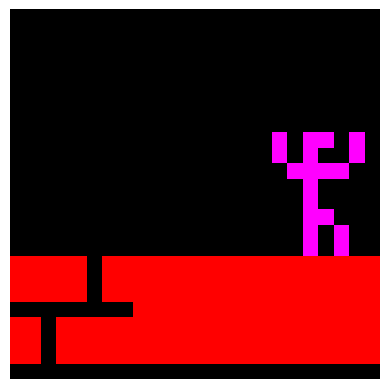

In [30]:
import Utils.Data.DataLoading as DataLoading
import Utils.Data.DataGen as DataGen

lrLevel1String = "../data/vglc/Lode Runner/Processed/Level 1.txt"

with open(lrLevel1String, "r") as f:
    levelString = np.array([list(line[:-1]) for line in f.readlines()])

levelString = DataGen.ResizeLevel(levelString, 1, 3)

for row in levelString[0]:
    print(row)

levelImage = DataLoading.TextTileToImage(levelString[0], 16, "../data/tomData/sprites/loderunner")
plt.imshow(levelImage)
plt.axis(False)

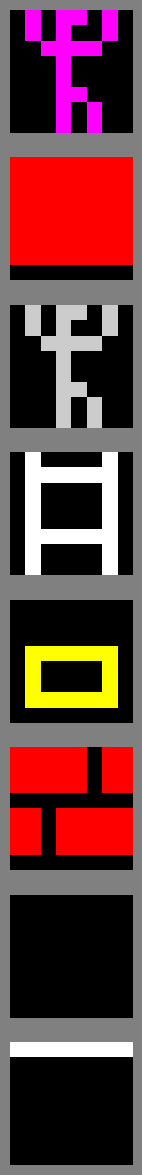

In [33]:
lrSpritePaths = glob.glob("../data/tomData/sprites/loderunner/*")
# lrSpritePaths = glob.glob("../data/sprites/loderunner/*")

lrTiles = [cv2.cvtColor(cv2.imread(spritePath), cv2.COLOR_BGR2RGB) for spritePath in lrSpritePaths]

fig, axes = plt.subplots(8, 1, figsize=(15, 15))
fig.patch.set_color("grey")

for j, ax in enumerate(axes):
    #for j, ax in enumerate(row):
    title = lrSpritePaths[j][lrSpritePaths[j].rfind('/')+1:lrSpritePaths[j].find('.png')]

    ax.axis(False)
    ax.imshow(lrTiles[j])